<a href="https://colab.research.google.com/github/shreyastejam/Facial-Emotion-Prediction/blob/main/facial_emotion_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Datasets

### FER-2013 Learn facial Expressions from an image - Kaggle

* The data consists of 48x48 pixel grayscale images of faces. The faces havebeen automatically registered so that the face is more or less centered and occupies about the same amount of space in each image.
* Facial expressions are divided into one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The training set consists of 28,709 examples and the public test set consists of 3,589 examples.

### Importing the necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf

In [ ]:
import os

### Exploring the dataset

In [ ]:
print(os.listdir('/content/fep'))

['train', 'test']


In [ ]:
train_path = '/content/fep/train'
val_path = '/content/fep/test'

In [ ]:
# Importing TensorFlow libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras import Sequential
from tensorflow import keras
from sklearn.model_selection import KFold

## Data Preprocessing
Explain the pre-processing done on your Dataset to make it suitable for applying machine learning algorithms.

We are getting the directories with images and storing the labels of the respective directories as lists. Then we rescale all images to a uniform size (<b>Normalization</b>) which allows all images to contribute equally to the total loss rather than when other images have high and low pixels ranges give strong and weak loss, respectively. Since high pixel images require a low learning rate and low pixel images high learning rate, re-scaling helps provide a standard learning rate for all images.

We also converted the colored images to Grayscale to reduce computation complexity (<b>Greyscale Conversion</b>). 

We have also used rescaling to augment data from the existing data (<b>Data Augumentation with rescaling</b>).

In [ ]:
emotion_labels = sorted(os.listdir(train_path))
print(emotion_labels)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [ ]:
batch_size = 64
target_size = (48,48)

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen   = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=target_size,
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical',
        shuffle=True)

val_generator = val_datagen.flow_from_directory(
        val_path,
        target_size=target_size,
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


# Data Summarization

### Dimensions of the Dataset

In [ ]:
input_shape = (48,48,1) # img_rows, img_colums, color_channels
num_classes = 7

### Statistical Summary of all attributes

In [ ]:
print(os.listdir('/content/fep/train'))

['happy', 'disgust', 'angry', 'fear', 'surprise', 'neutral', 'sad']


In [ ]:
from matplotlib import pyplot as plt


### Breakdown of all data class variable

In [ ]:
def plot_images(img_dir, top=10):
    all_img_dirs = os.listdir(img_dir)
    img_files = [os.path.join(img_dir, file) for file in all_img_dirs][:5]
  
    plt.figure(figsize=(12, 12))
  
    for idx, img_path in enumerate(img_files):
        plt.subplot(5, 5, idx+1)
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray')

Angry: 



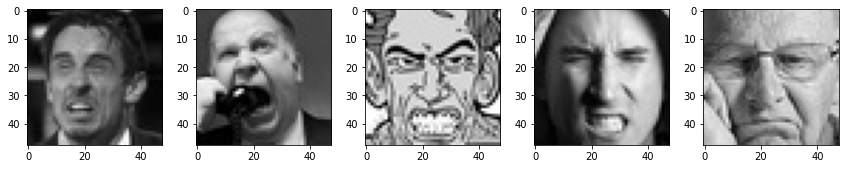

In [ ]:
print('Angry: ')
print()
plot_images(train_path+'/angry')

Disgust: 



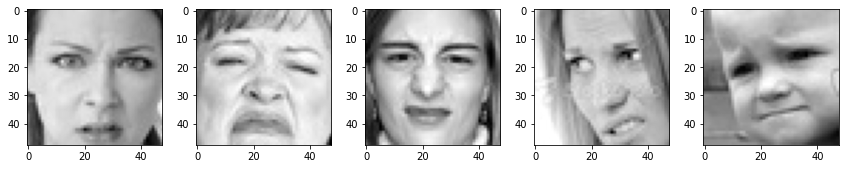

In [ ]:
print('Disgust: ')
print()
plot_images(train_path+'/disgust')

Fear: 



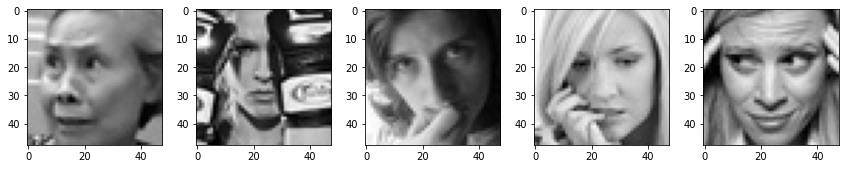

In [ ]:
print('Fear: ')
print()
plot_images(train_path+'/fear')

Happy: 



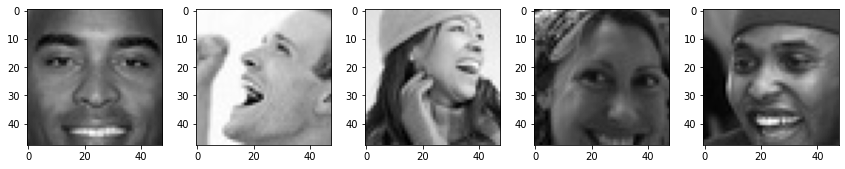

In [ ]:
print('Happy: ')
print()
plot_images(train_path+'/happy')

Neutral: 



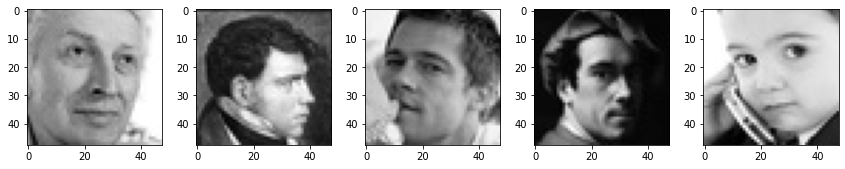

In [ ]:
print('Neutral: ')
print()
plot_images(train_path+'/neutral')

Sad: 



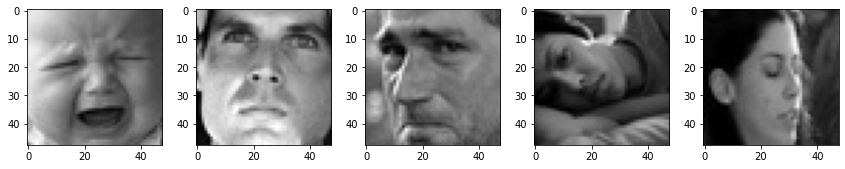

In [ ]:
print('Sad: ')
print()
plot_images(train_path+'/sad')

Surprise: 



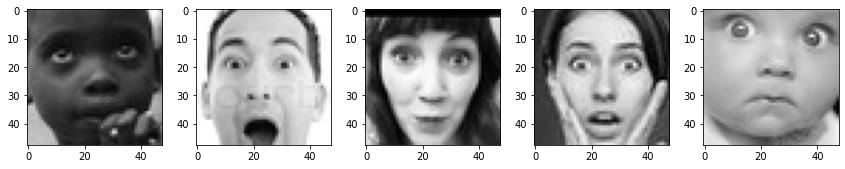

In [ ]:
print('Surprise: ')
print()
plot_images(train_path+'/surprise')

## Data Visualization

In [ ]:
emotions = os.listdir('/content/fep/train')
for emotion in emotions:
    count = len(os.listdir(f'/content/fep/train/{emotion}'))
    print(f'{emotion} faces={count}')

happy faces=7215
disgust faces=436
angry faces=3995
fear faces=4097
surprise faces=3171
neutral faces=4965
sad faces=4830


In [ ]:
emotions = os.listdir('/content/fep/test')
for emotion in emotions:
    count = len(os.listdir(f'/content/fep/test/{emotion}'))
    print(f'{emotion} faces={count}')

happy faces=1774
disgust faces=111
angry faces=958
fear faces=1024
surprise faces=831
neutral faces=1233
sad faces=1247


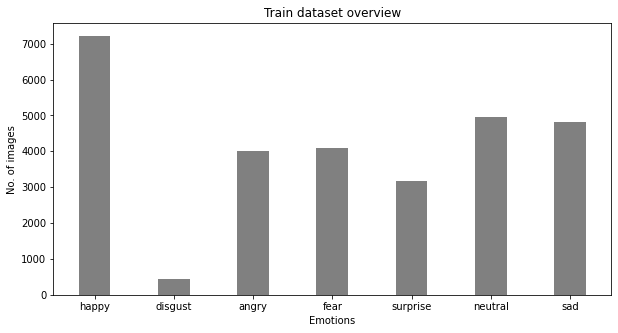

In [ ]:
emotions = os.listdir('/content/fep/train')
values = [len(os.listdir(f'/content/fep/train/{emotion}')) for emotion in emotions]
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(emotions, values, color ='grey',
        width = 0.4)

plt.xlabel("Emotions")
plt.ylabel("No. of images")
plt.title("Train dataset overview")
plt.show()

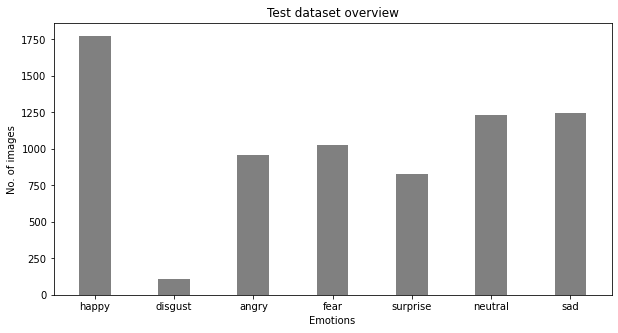

In [ ]:
emotions = os.listdir('/content/fep/test')
values = [len(os.listdir(f'/content/fep/test/{emotion}')) for emotion in emotions]
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(emotions, values, color ='grey',
        width = 0.4)

plt.xlabel("Emotions")
plt.ylabel("No. of images")
plt.title("Test dataset overview")
plt.show()

## Python Packages

1. Numpy
2. Pandas
3. Matplotlib
4. OS
5. Tensorflow
6. Sklearn

# Supervised Learning

## 1. Convolutional Neural Network (CNN)

Convolutional neural networks (CNN) is a special architecture of artificial neural networks. CNNs uses some of its features of visual cortex and have therefore achieved state of the art results in computer vision tasks.

Convolutional neural networks are comprised of two very simple elements, namely convolutional layers and pooling layers.
Although simple, there are near-infinite ways to arrange these layers for a given computer vision problem.
The elements of a convolutional neural network, such as convolutional and pooling layers, are relatively straightforward to understand.
The challenging part of using convolutional neural networks in practice is how to design model architectures that best use these simple elements.

### Building the Model

In [ ]:
model = Sequential()
model.add(layers.Conv2D(16,(5,5),padding='valid',input_shape = input_shape)) # Convolutional layers
model.add(layers.Activation('relu')) # activation functions
model.add(layers.MaxPooling2D(pool_size=(2,2),strides=2,padding = 'valid')) # to reduce size of image
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(32,(5,5),padding='valid'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2),strides=2,padding = 'valid'))
model.add(layers.Dropout(0.6))

model.add(layers.Conv2D(64,(5,5),padding='valid'))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.8))
model.add(layers.Flatten())
model.add(layers.Dense(7)) # classification

model.add(layers.Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 44, 44, 16)        416       
                                                                 
 activation (Activation)     (None, 44, 44, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 18, 18, 32)        12832     
                                                                 
 activation_1 (Activation)   (None, 18, 18, 32)        0         
                                                        

In [ ]:
# Compile Model
optimizer = keras.optimizers.RMSprop(lr = 0.0001, decay = 1e-6)
model.compile(loss = 'binary_crossentropy',optimizer = optimizer, metrics = ['accuracy',keras.metrics.Precision(), keras.metrics.Recall()])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


### Training the Model

In [ ]:
num_epochs = 100

STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VAL   = val_generator.n//val_generator.batch_size

In [ ]:
# Train Model
history = model.fit(train_generator, steps_per_epoch=STEP_SIZE_TRAIN, epochs=num_epochs, batch_size=batch_size, validation_data=val_generator, validation_steps=STEP_SIZE_VAL)
history

Epoch 1/100
448/448 [==============================] - 74s 162ms/step - loss: 0.4287 - accuracy: 0.2058 - precision: 0.2190 - recall: 0.0137 - val_loss: 0.4729 - val_accuracy: 0.2472 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
448/448 [==============================] - 75s 166ms/step - loss: 0.3969 - accuracy: 0.2308 - precision: 0.2438 - recall: 0.0014 - val_loss: 0.4476 - val_accuracy: 0.2472 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/100
448/448 [==============================] - 71s 158ms/step - loss: 0.3915 - accuracy: 0.2449 - precision: 0.3333 - recall: 1.3964e-04 - val_loss: 0.4303 - val_accuracy: 0.2471 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/100
448/448 [==============================] - 68s 152ms/step - loss: 0.3885 - accuracy: 0.2532 - precision: 0.3750 - recall: 1.0473e-04 - val_loss: 0.4241 - val_accuracy: 0.2540 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/100
448/448 [===========================

### k-fold Cross Validation

In [ ]:
# kfold = KFold(n_splits=10, shuffle=True, random_state=42)
# cvscores = []

# for train_index, test_index in kfold.split(train_generator, val_generator):
#     model = Sequential()
#     model.add(layers.Conv2D(16,(5,5),padding='valid',input_shape = input_shape))
#     model.add(layers.Activation('relu'))
#     model.add(layers.MaxPooling2D(pool_size=(2,2),strides=2,padding = 'valid'))
#     model.add(layers.Dropout(0.4))

#     model.add(layers.Conv2D(32,(5,5),padding='valid'))
#     model.add(layers.Activation('relu'))
#     model.add(layers.MaxPooling2D(pool_size=(2,2),strides=2,padding = 'valid'))
#     model.add(layers.Dropout(0.6))

#     model.add(layers.Conv2D(64,(5,5),padding='valid'))
#     model.add(layers.Activation('relu'))
#     model.add(layers.Dropout(0.8))
#     model.add(layers.Flatten())
#     model.add(layers.Dense(7))

#     model.add(layers.Activation('softmax'))
    
#     optimizer = keras.optimizers.RMSprop(lr = 0.0001, decay = 1e-6)
#     model.compile(loss = 'binary_crossentropy',optimizer = optimizer, metrics = ['accuracy',keras.metrics.Precision(), keras.metrics.Recall()])
    
#     X_train, X_test = train_generator[train_index], train_generator[test_index]
#     y_train, y_test = val_generator[train_index], val_generator[test_index]
#     history = model.fit(X_train, steps_per_epoch=STEP_SIZE_TRAIN, epochs=num_epochs, batch_size=batch_size, validation_data=y_train, validation_steps=STEP_SIZE_VAL)
    
#     scores = model.evaluate(X[test], y[test], verbose=0)
#     print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
#     cvscores.append(scores[1] * 100)

# print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

### Save Model

In [ ]:
models.save_model(model, 'CNN.h5')

### Evaluate Model

In [ ]:
cnn_score = model.evaluate_generator(val_generator, steps=STEP_SIZE_VAL) 
print('Test loss: ', cnn_score[0])
print('Test accuracy: ', cnn_score[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


Test loss:  0.28951674699783325
Test accuracy:  0.525390625


### Show Training History

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])


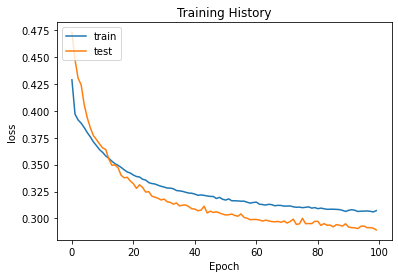

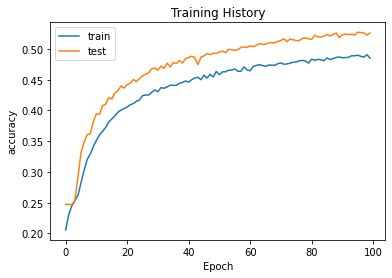

In [ ]:
keys=history.history.keys()
print(keys)

def show_train_history(hisData,train,test): 
    plt.plot(hisData.history[train])
    plt.plot(hisData.history[test])
    plt.title('Training History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

show_train_history(history, 'loss', 'val_loss')
show_train_history(history, 'accuracy', 'val_accuracy')

## 2. Support Vector Machine (SVM)

It is a supervised machine learning algorithm used for both regression and classification problems.
When used for classification purposes, it separates the classes using a linear boundary.

Generally, Support Vector Machines(SVM) is considered to be a classification approach but it can be employed in both types of classification and regression problems. It can easily handle multiple continuous and categorical variables. SVM constructs a hyperplane in multidimensional space to separate different classes. SVM generates optimal hyperplane in an iterative manner, which is used to minimize an error. The core idea of SVM is to find a maximum marginal hyperplane(MMH) that best divides the dataset into classes.

### Building the Model

In [ ]:
num_epochs = 100
number_of_classes = 7

In [ ]:
model = Sequential()
model.add(layers.Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3, strides = 2,input_shape=input_shape))
model.add(layers.MaxPool2D(pool_size=(2,2),strides = 2))

model.add(layers.Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3))
model.add(layers.MaxPool2D(pool_size=(2,2),strides = 2))

model.add(layers.Flatten())
model.add(layers.Dense(128,activation="relu"))

#Output layer
model.add(layers.Dense(1,kernel_regularizer=regularizers.l2(0.01),activation = "linear"))

In [ ]:
model.add(layers.Dense(number_of_classes,kernel_regularizer = regularizers.l2(0.01),activation= "softmax"))
model.compile(optimizer="adam",loss="squared_hinge", metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 24, 24, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1152)              0         
                                                                 
 dense_1 (Dense)             (None, 128)              

### Training the Model

In [ ]:
history = model.fit(x=train_generator, steps_per_epoch=STEP_SIZE_TRAIN, epochs=num_epochs, batch_size=batch_size, validation_data=val_generator, validation_steps=STEP_SIZE_VAL)

Epoch 1/100
448/448 [==============================] - 24s 51ms/step - loss: 1.2284 - accuracy: 0.2111 - val_loss: 1.2156 - val_accuracy: 0.2379
Epoch 2/100
448/448 [==============================] - 23s 52ms/step - loss: 1.2080 - accuracy: 0.2734 - val_loss: 1.1957 - val_accuracy: 0.3032
Epoch 3/100
448/448 [==============================] - 24s 53ms/step - loss: 1.1905 - accuracy: 0.3079 - val_loss: 1.1812 - val_accuracy: 0.3193
Epoch 4/100
448/448 [==============================] - 25s 55ms/step - loss: 1.1796 - accuracy: 0.3297 - val_loss: 1.1742 - val_accuracy: 0.3401
Epoch 5/100
448/448 [==============================] - 26s 59ms/step - loss: 1.1734 - accuracy: 0.3478 - val_loss: 1.1693 - val_accuracy: 0.3576
Epoch 6/100
448/448 [==============================] - 25s 56ms/step - loss: 1.1682 - accuracy: 0.3597 - val_loss: 1.1653 - val_accuracy: 0.3659
Epoch 7/100
448/448 [==============================] - 25s 56ms/step - loss: 1.1649 - accuracy: 0.3650 - val_loss: 1.1687 - val_ac

### Save Model

In [ ]:
models.save_model(model, 'SVM.h5')

### Evaluate Model

In [ ]:
svm_score = model.evaluate_generator(val_generator, steps=STEP_SIZE_VAL) 
print('Test loss: ', svm_score[0])
print('Test accuracy: ', svm_score[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


Test loss:  1.1447316408157349
Test accuracy:  0.431640625


### Show Training History

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


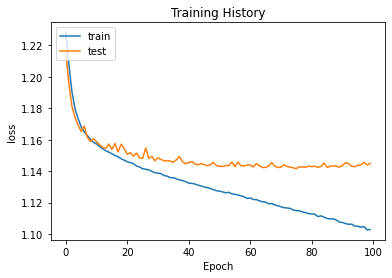

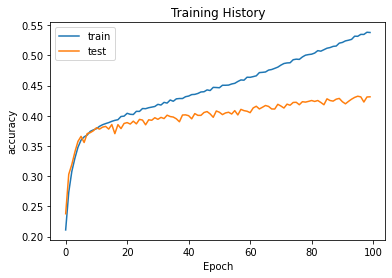

In [ ]:
keys=history.history.keys()
print(keys)

def show_train_history(hisData,train,test): 
    plt.plot(hisData.history[train])
    plt.plot(hisData.history[test])
    plt.title('Training History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

show_train_history(history, 'loss', 'val_loss')
show_train_history(history, 'accuracy', 'val_accuracy')

## 3. Artificial Neural Networks (ANN)

ANNs are implemented as a system of interconnected processing elements, called nodes, which are functionally analogous to biological neurons.The connections between different nodes have numerical values, called weights, and by altering these values in a systematic way, the network is eventually able to approximate the desired function.

### Building the Model

In [ ]:
model_ann = Sequential()
model_ann.add(layers.Dense(16, input_shape=input_shape, activation='relu'))
model_ann.add(layers.Dropout(0.4))
model_ann.add(layers.Dense(32, activation='relu'))
model_ann.add(layers.Dropout(0.6))
model_ann.add(layers.Flatten())
model_ann.add(layers.Dense(7, activation='softmax'))

model_ann.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 48, 48, 16)        32        
                                                                 
 dropout_3 (Dropout)         (None, 48, 48, 16)        0         
                                                                 
 dense_5 (Dense)             (None, 48, 48, 32)        544       
                                                                 
 dropout_4 (Dropout)         (None, 48, 48, 32)        0         
                                                                 
 flatten_2 (Flatten)         (None, 73728)             0         
                                                                 
 dense_6 (Dense)             (None, 7)                 516103    
                                                                 
Total params: 516,679
Trainable params: 516,679
Non-tr

In [ ]:
model_ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model_ann.fit(x=train_generator, steps_per_epoch=STEP_SIZE_TRAIN, epochs=num_epochs, batch_size=batch_size, validation_data=val_generator, validation_steps=STEP_SIZE_VAL)
history

Epoch 1/100
448/448 [==============================] - 74s 166ms/step - loss: 0.3273 - accuracy: 0.4460 - val_loss: 0.3767 - val_accuracy: 0.3842
Epoch 2/100
448/448 [==============================] - 68s 153ms/step - loss: 0.3281 - accuracy: 0.4462 - val_loss: 0.3700 - val_accuracy: 0.3763
Epoch 3/100
448/448 [==============================] - 68s 152ms/step - loss: 0.3277 - accuracy: 0.4432 - val_loss: 0.3711 - val_accuracy: 0.3860
Epoch 4/100
448/448 [==============================] - 69s 153ms/step - loss: 0.3284 - accuracy: 0.4408 - val_loss: 0.3759 - val_accuracy: 0.3818
Epoch 5/100
448/448 [==============================] - 69s 153ms/step - loss: 0.3281 - accuracy: 0.4433 - val_loss: 0.3724 - val_accuracy: 0.3853
Epoch 6/100
448/448 [==============================] - 67s 149ms/step - loss: 0.3276 - accuracy: 0.4473 - val_loss: 0.3700 - val_accuracy: 0.3866
Epoch 7/100
448/448 [==============================] - 67s 150ms/step - loss: 0.3279 - accuracy: 0.4453 - val_loss: 0.3709 -

### Save Model

In [ ]:
models.save_model(model, 'ANN.h5')

### Evaluate Model

In [ ]:
ann_score = model.evaluate_generator(val_generator, steps=STEP_SIZE_VAL) 
print('Test loss: ', ann_score[0])
print('Test accuracy: ', ann_score[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


Test loss:  1.1449745893478394
Test accuracy:  0.4309430718421936


### Show Training History

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


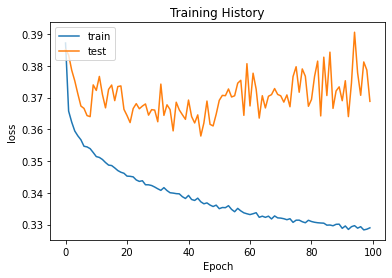

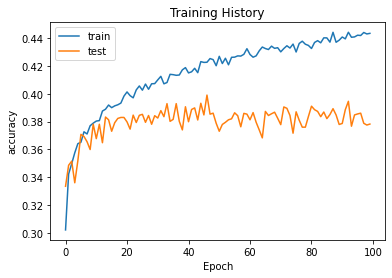

In [ ]:
keys=history.history.keys()
print(keys)

def show_train_history(hisData,train,test): 
    plt.plot(hisData.history[train])
    plt.plot(hisData.history[test])
    plt.title('Training History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

show_train_history(history, 'loss', 'val_loss')
show_train_history(history, 'accuracy', 'val_accuracy')

## Comparing accuracy to find best Model

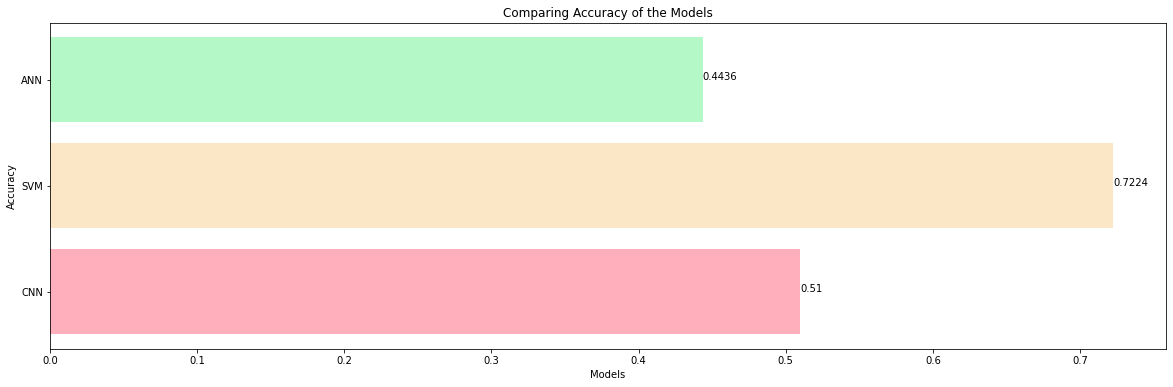

In [ ]:
# Accuracy of the different models
names = ['CNN', 'SVM', 'ANN']
compare_acc = [0.51, 0.7224, 0.4436]
# compare_acc = [0.94, 0.23, 0.45]
plt.figure(figsize=(20,6))


plt.barh(names,compare_acc, color=['#FFAEBC', '#FBE7C6', '#B4F8C8'])
for index, value in enumerate(compare_acc):
    plt.text(value, index, str(value))
plt.title('Comparing Accuracy of the Models')
plt.ylabel('Accuracy')
plt.xlabel('Models')

plt.show()